In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# confusion_matrix
from sklearn.metrics import confusion_matrix
# precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("./StressLevelDataset.csv")

In [3]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [5]:
data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [6]:
data['stress_level'].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

Academic Factors: 學術因素：

In [7]:
data['academic_performance'].value_counts()

academic_performance
2    348
4    188
1    185
5    182
3    169
0     28
Name: count, dtype: int64

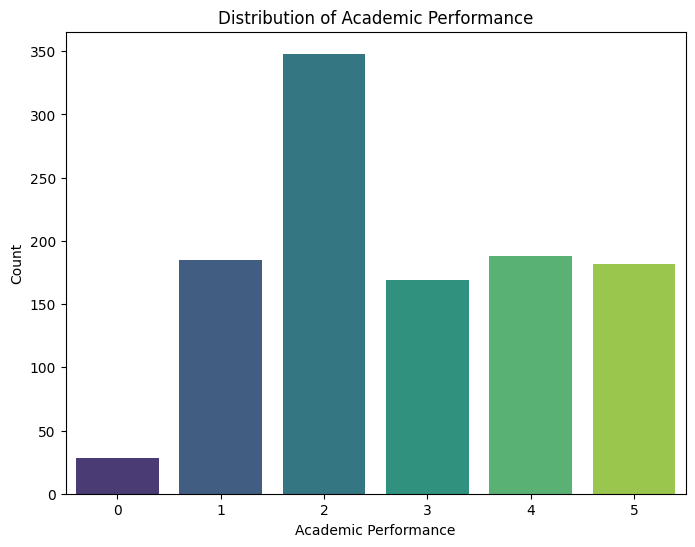

In [22]:
# Count values
academic_performance_counts = data['academic_performance'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=academic_performance_counts.index, y=academic_performance_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Academic Performance')
plt.xlabel('Academic Performance')
plt.ylabel('Count')

# Show the plot
plt.show()

In [8]:
data['academic_performance'].describe()

count    1100.000000
mean        2.772727
std         1.414594
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: academic_performance, dtype: float64

5 -> 182<br>
4 -> 188<br>
3 -> 169<br>
2 -> 348<br>
1 -> 185<br>
0 ->  28

In [9]:
data['study_load'].value_counts()

study_load
2    333
3    275
1    185
4    142
5    128
0     37
Name: count, dtype: int64

5 -> 128<br>
4 -> 142<br>
3 -> 275<br>
2 -> 333<br>
1 -> 185<br>
0 ->  37

Study Load Mean: 2.6218181818181816


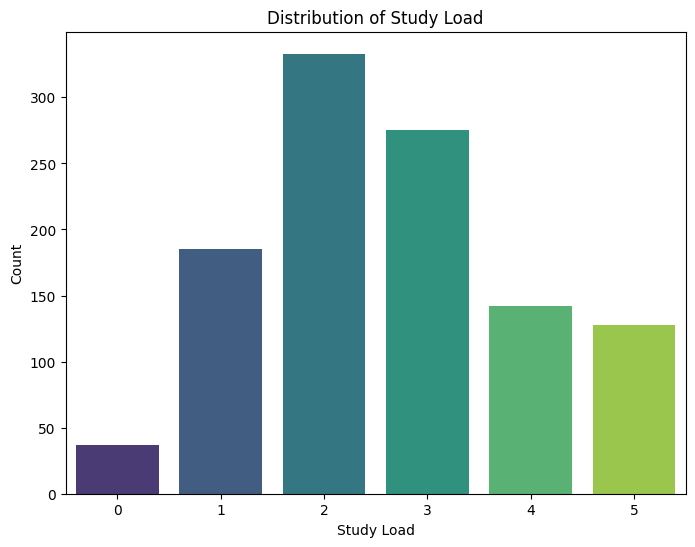

In [26]:
# Count values
study_load_counts = data['study_load'].value_counts()

# Calculate the mean
study_load_mean = data['study_load'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=study_load_counts.index, y=study_load_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Study Load')
plt.xlabel('Study Load')
plt.ylabel('Count')

# Print the mean
print(f"Study Load Mean: {study_load_mean}")

# Show the plot
plt.show()

In [10]:
data['future_career_concerns'].value_counts()

future_career_concerns
1    327
2    199
5    186
4    185
3    173
0     30
Name: count, dtype: int64

5 -> 186<br>
4 -> 185<br>
3 -> 173<br>
2 -> 199<br>
1 -> 327<br>
0 ->  30

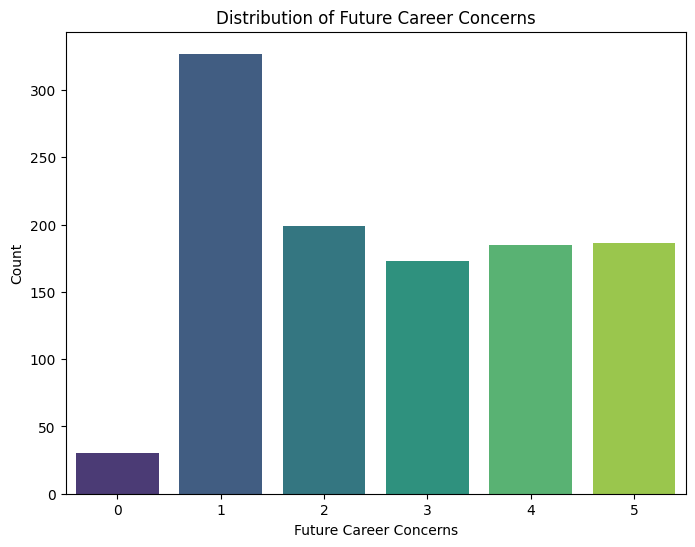

In [27]:
# Count values
future_career_counts = data['future_career_concerns'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=future_career_counts.index, y=future_career_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Future Career Concerns')
plt.xlabel('Future Career Concerns')
plt.ylabel('Count')

# Show the plot
plt.show()

Social Factors: 社會因素：

In [11]:
data['social_support'].value_counts()

social_support
3    458
1    412
2    142
0     88
Name: count, dtype: int64

3 -> 458<br>
2 -> 142<br>
1 -> 412<br>
0 ->  88

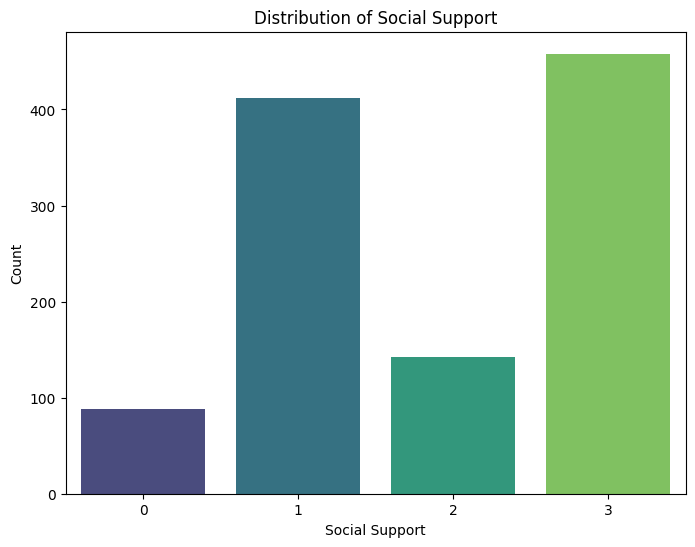

In [28]:

# Count values
social_support_counts = data['social_support'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=social_support_counts.index, y=social_support_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Social Support')
plt.xlabel('Social Support')
plt.ylabel('Count')

# Show the plot
plt.show()

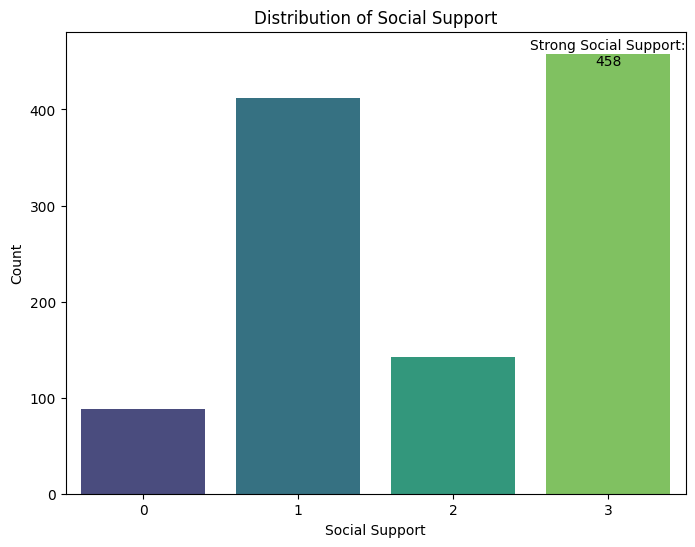

In [68]:
# Count values
social_support_counts = data['social_support'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=social_support_counts.index, y=social_support_counts.values, palette='viridis')

# Highlight the count for strong social support (assuming level 3)
highlighted_index = 3
highlighted_count = social_support_counts.loc[highlighted_index]

# Adding labels and title
plt.title('Distribution of Social Support')
plt.xlabel('Social Support')
plt.ylabel('Count')

# Highlighting the count for strong social support
plt.text(highlighted_index, highlighted_count - 12, f"Strong Social Support:\n{highlighted_count}", ha='center')

# Show the plot
plt.show()

In [12]:
data['extracurricular_activities'].value_counts()

extracurricular_activities
2    332
4    198
1    184
3    178
5    174
0     34
Name: count, dtype: int64

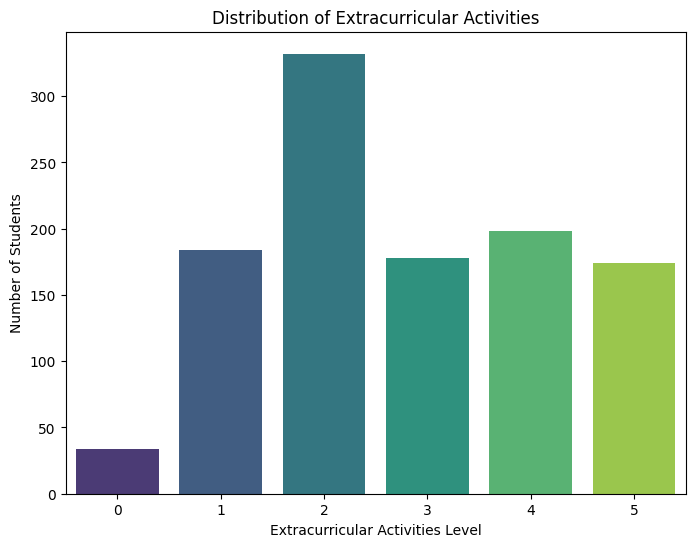

In [69]:
# Count values
extracurricular_counts = data['extracurricular_activities'].value_counts()

# Calculate the total number of students
total_students = len(data)

# Calculate the percentage of students for each level of extracurricular activities
extracurricular_percentages = (extracurricular_counts / total_students) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=extracurricular_counts.index, y=extracurricular_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Extracurricular Activities')
plt.xlabel('Extracurricular Activities Level')
plt.ylabel('Number of Students')

# Show the plot
plt.show()

5 -> 174<br>
4 -> 198<br>
3 -> 178<br>
2 -> 332<br>
1 -> 184<br>
0 ->  34

In [13]:
data['bullying'].value_counts()

bullying
1    335
3    199
4    187
5    173
2    167
0     39
Name: count, dtype: int64

5    173
4    187
3    199
2    167
1    335
0     39

Number of students who have experienced bullying: 335


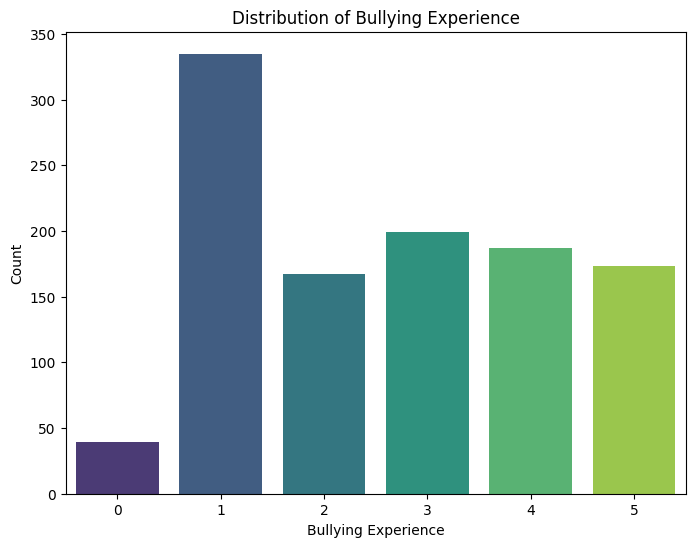

In [37]:
# Count values
bullying_counts = data['bullying'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=bullying_counts.index, y=bullying_counts.values, palette='viridis')

# Print the count for students who have experienced bullying (assuming level 1)
bullying_count = bullying_counts.loc[1]
print(f"Number of students who have experienced bullying: {bullying_count}")

# Adding labels and title
plt.title('Distribution of Bullying Experience')
plt.xlabel('Bullying Experience')
plt.ylabel('Count')

# Show the plot
plt.show()

39
335
167
199
187
173


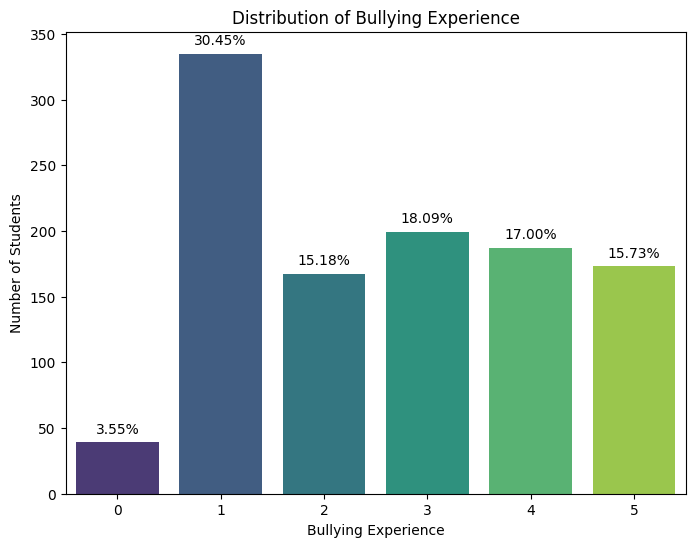

In [63]:
# Count values
bullying_counts = data['bullying'].value_counts()

# Calculate the total number of students
total_students = len(data)

# Calculate the percentage of students who have experienced bullying for each level
# bullying_percentages = (bullying_counts / total_students) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=bullying_counts.index, y=bullying_counts.values, palette='viridis')

# Adding labels and title
plt.title('Distribution of Bullying Experience')
plt.xlabel('Bullying Experience')
plt.ylabel('Number of Students')

# Annotating the bars with percentages
for index, value in enumerate(bullying_counts.values):
    print(bullying_counts[index])
    percentage = (bullying_counts[index] / total_students) * 100
    plt.text(index, bullying_counts[index] + 5, f"{percentage:.2f}%", ha='center', va='bottom')

# Show the plot
plt.show()

Comparative Analysis: 比較分析：

In [74]:
print(data['anxiety_level'].value_counts())
# print(data['academic_performance'].value_counts())

anxiety_level
13    67
10    63
19    61
21    61
9     60
12    56
18    55
11    54
6     52
15    51
7     51
14    51
3     48
17    47
1     46
2     46
16    45
8     44
5     40
20    40
4     33
0     29
Name: count, dtype: int64


In [15]:
correlation = data['anxiety_level'].corr(data['academic_performance'])

print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: -0.6496011296145091


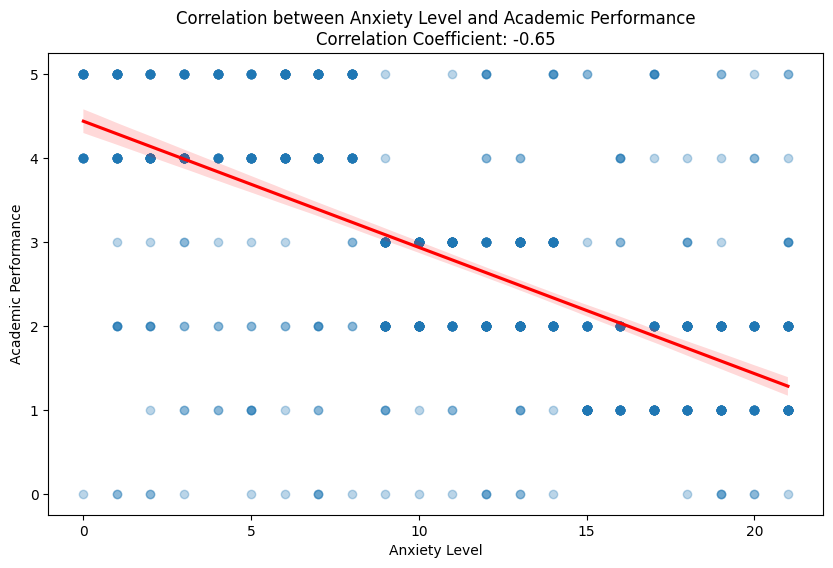

In [78]:
# Calculate the correlation coefficient
correlation_coefficient = data['anxiety_level'].corr(data['academic_performance'])

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='anxiety_level', y='academic_performance', data=data, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})

# Adding labels, title, and correlation coefficient
plt.title(f'Correlation between Anxiety Level and Academic Performance\nCorrelation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Anxiety Level')
plt.ylabel('Academic Performance')

# Show the plot
plt.show()


In [76]:
# data['sleep_quality'].value_counts()
data['depression'].value_counts()

depression
10    66
13    63
12    63
14    57
8     49
3     47
11    46
9     46
0     44
5     43
7     42
18    41
6     36
22    36
1     36
27    36
2     36
4     35
24    34
26    33
20    33
17    30
19    29
21    28
23    27
25    27
15    21
16    16
Name: count, dtype: int64

In [16]:
correlation = data['sleep_quality'].corr(data['depression'])

print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: -0.6931609071393333


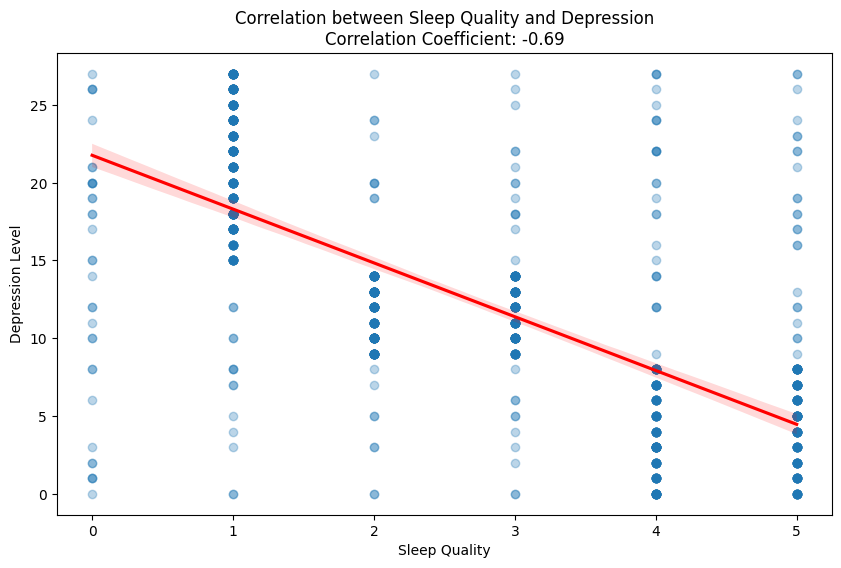

In [77]:
# Calculate the correlation coefficient
correlation_coefficient = data['sleep_quality'].corr(data['depression'])

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='sleep_quality', y='depression', data=data, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})

# Adding labels, title, and correlation coefficient
plt.title(f'Correlation between Sleep Quality and Depression\nCorrelation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Sleep Quality')
plt.ylabel('Depression Level')

# Show the plot
plt.show()

mental_health_history
bullying

In [17]:
print(data['mental_health_history'].value_counts())

mental_health_history
0    558
1    542
Name: count, dtype: int64


In [18]:
correlation = data['mental_health_history'].corr(data['bullying'])

print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: 0.6243657971517645


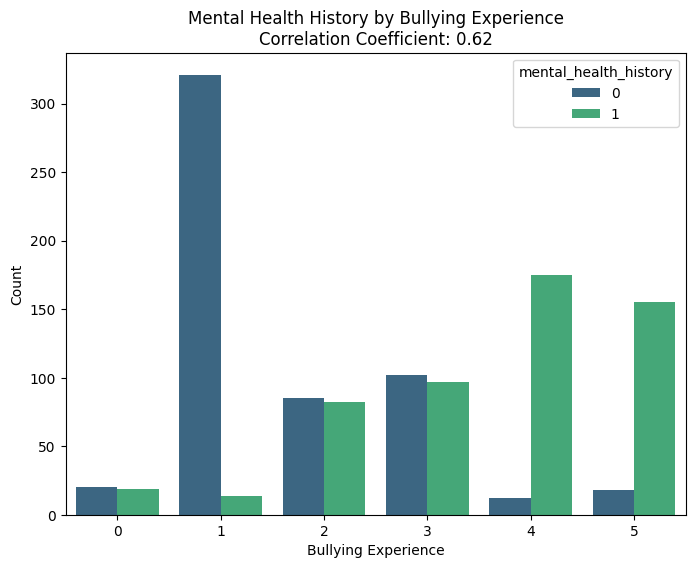

In [84]:
correlation_coefficient = data['mental_health_history'].corr(data['bullying'])

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='bullying', hue='mental_health_history', data=data, palette='viridis')

# Adding labels and title
plt.title(f'Mental Health History by Bullying Experience\nCorrelation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Bullying Experience')
plt.ylabel('Count')

# Show the plot
plt.show()

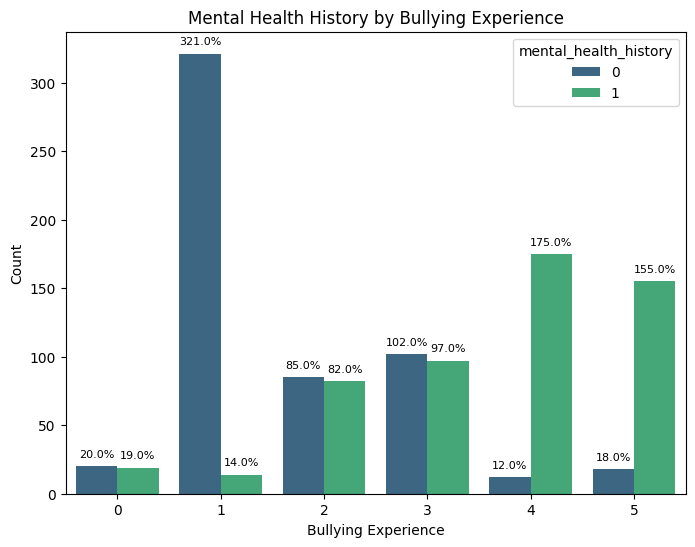

In [82]:
# Calculate the percentage of mental health history for each level of bullying
mental_health_percentage = data.groupby(['bullying', 'mental_health_history']).size() / data.groupby('bullying').size() * 100
mental_health_percentage = mental_health_percentage.unstack()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='bullying', hue='mental_health_history', data=data, palette='viridis')

# Adding labels and title
plt.title('Mental Health History by Bullying Experience')
plt.xlabel('Bullying Experience')
plt.ylabel('Count')

# Annotating the bars with percentages
for p in ax.patches:
    height = p.get_height() if not p.get_height() != p.get_height() else 0  # Handle NaN values
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

General Exploration: 一般探索：

In [19]:
# 計算每個因素下報告負面經驗的學生數量
negative_reports = data[data > 0].sum()

# 找出最多的因素
most_negative_factor = negative_reports.idxmax()

print(f"The factor with the most negative reports is: {most_negative_factor}")

The factor with the most negative reports is: self_esteem


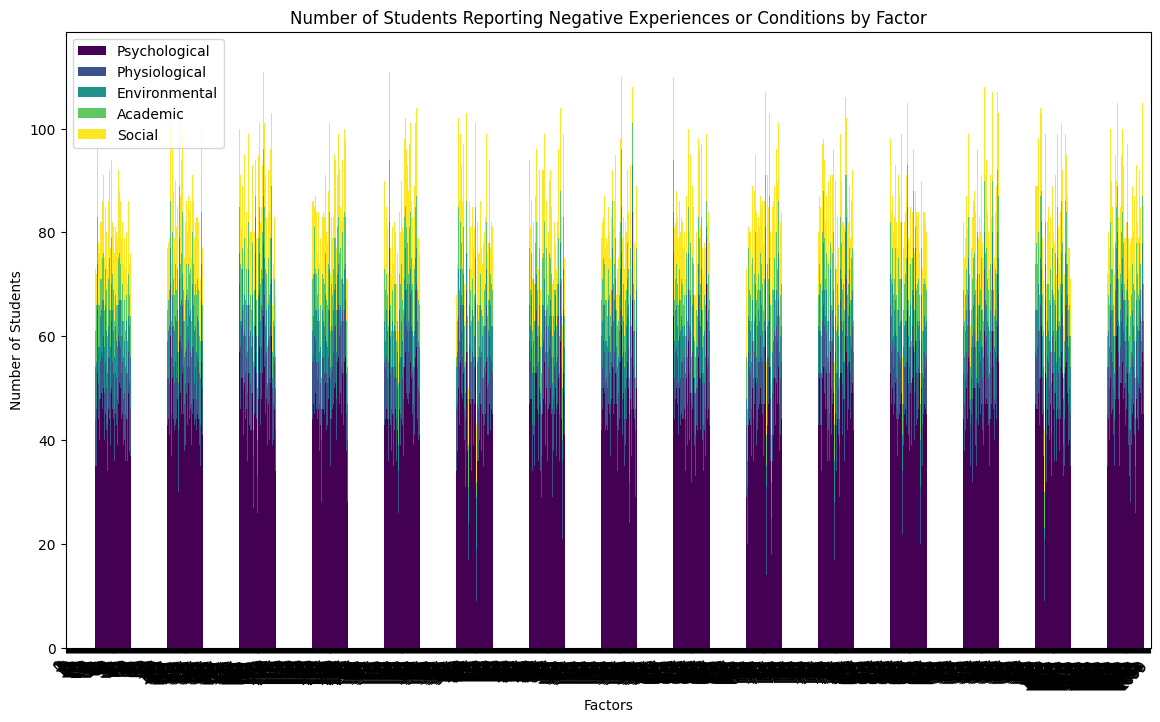

In [97]:
# List of factors and their corresponding columns
factors = {
    'Psychological': ['self_esteem', 'depression', 'safety', 'anxiety_level', 'mental_health_history'],
    'Physiological': ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'],
    'Environmental': ['noise_level', 'living_conditions', 'basic_needs'],
    'Academic': ['academic_performance', 'study_load', 'future_career_concerns'],
    'Social': ['social_support', 'bullying', 'extracurricular_activities', 'teacher_student_relationship', 'peer_pressure']
}

# Create a DataFrame with 0s and 1s indicating reported or not reported
report_data = pd.DataFrame({factor: data[columns].sum(axis=1) for factor, columns in factors.items()})

# Plotting a stacked bar plot
ax = report_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Adding labels and title
plt.title('Number of Students Reporting Negative Experiences or Conditions by Factor')
plt.xlabel('Factors')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

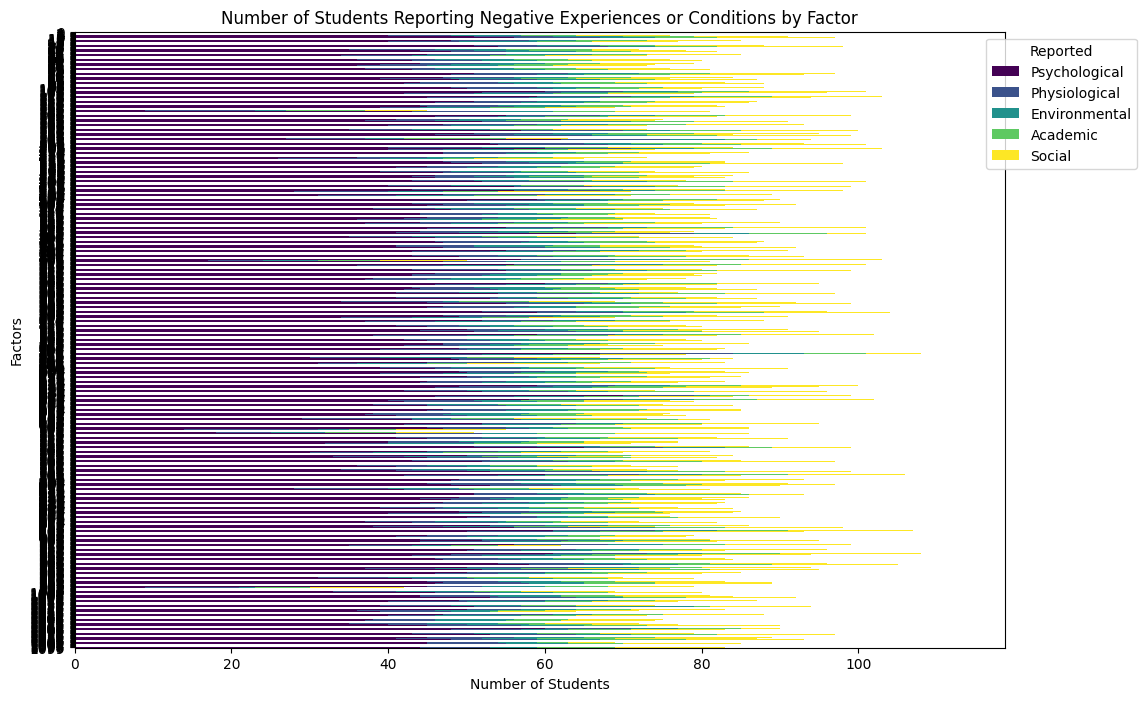

In [99]:
# List of factors and their corresponding columns
factors = {
    'Psychological': ['self_esteem', 'depression', 'safety', 'anxiety_level', 'mental_health_history'],
    'Physiological': ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'],
    'Environmental': ['noise_level', 'living_conditions', 'basic_needs'],
    'Academic': ['academic_performance', 'study_load', 'future_career_concerns'],
    'Social': ['social_support', 'bullying', 'extracurricular_activities', 'teacher_student_relationship', 'peer_pressure']
}

# Create a DataFrame with 0s and 1s indicating reported or not reported
report_data = pd.DataFrame({factor: data[columns].sum(axis=1) for factor, columns in factors.items()})

# Plotting a horizontal bar plot for better clarity
ax = report_data.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')

# Adding labels and title
plt.title('Number of Students Reporting Negative Experiences or Conditions by Factor')
plt.xlabel('Number of Students')
plt.ylabel('Factors')

# Adding legend outside the plot for better clarity
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='Reported')

# Invert y-axis for better alignment with the factors
plt.gca().invert_yaxis()

# Show the plot
plt.show()

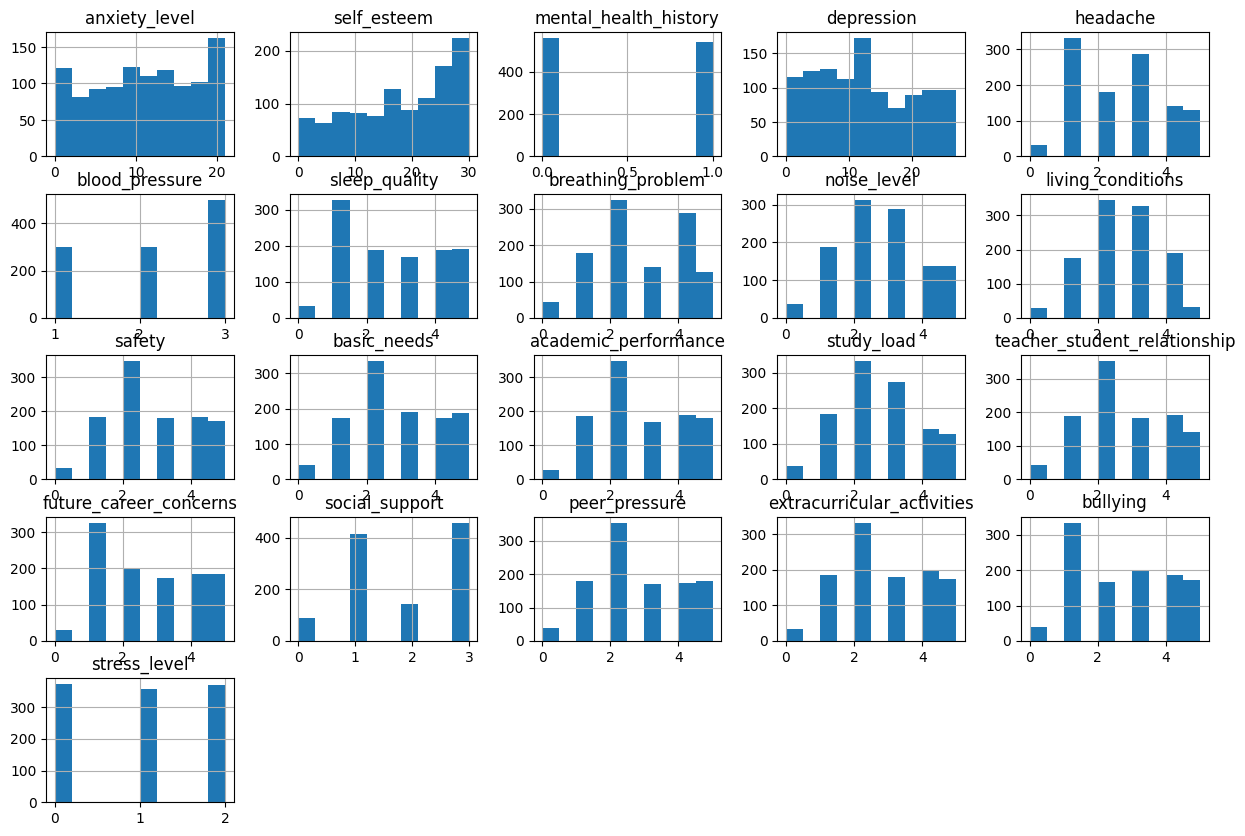

In [20]:
# 繪製不同因素的直方圖
data.hist(bins=10, figsize=(15, 10))
plt.show()

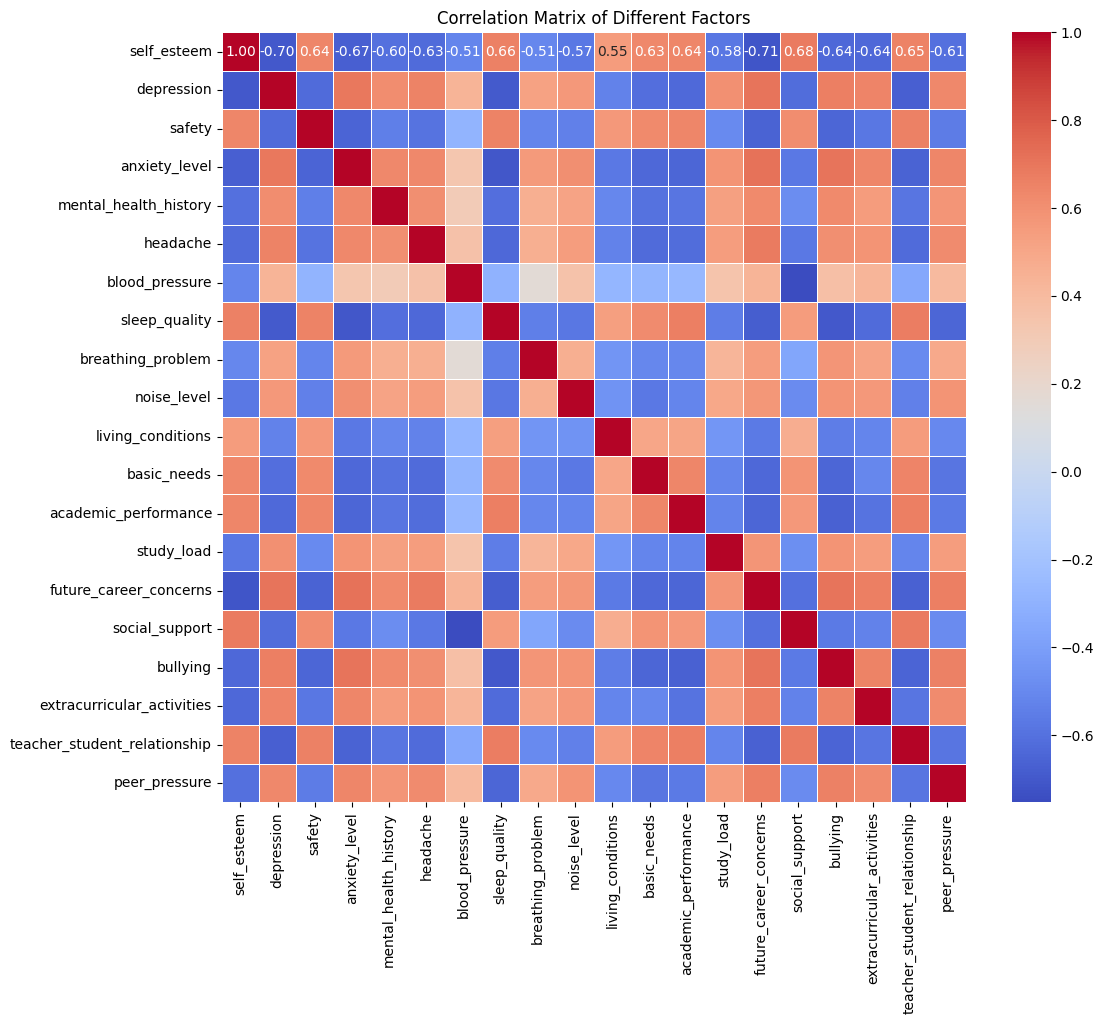

In [98]:
# List of factors and their corresponding columns
factors = {
    'Psychological': ['self_esteem', 'depression', 'safety', 'anxiety_level', 'mental_health_history'],
    'Physiological': ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'],
    'Environmental': ['noise_level', 'living_conditions', 'basic_needs'],
    'Academic': ['academic_performance', 'study_load', 'future_career_concerns'],
    'Social': ['social_support', 'bullying', 'extracurricular_activities', 'teacher_student_relationship', 'peer_pressure']
}

# Extract the columns for each factor
factor_columns = {factor: data[columns] for factor, columns in factors.items()}

# Concatenate factor columns into a single DataFrame
factors_df = pd.concat(factor_columns.values(), axis=1)

# Create a correlation matrix
correlation_matrix = factors_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adding title
plt.title('Correlation Matrix of Different Factors')

# Show the plot
plt.show()

In [21]:
# 計算每個欄位與 'stress_level' 的相關係數
correlations = data.corr()['stress_level']

# 找出每個特徵對 'stress_level' 的相對影響程度
most_impactful_features = correlations.drop('stress_level').sort_values(ascending=False)

# 輸出相關性排序
print("Features ranked by correlation with stress_level:")
print(most_impactful_features)

Features ranked by correlation with stress_level:
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64


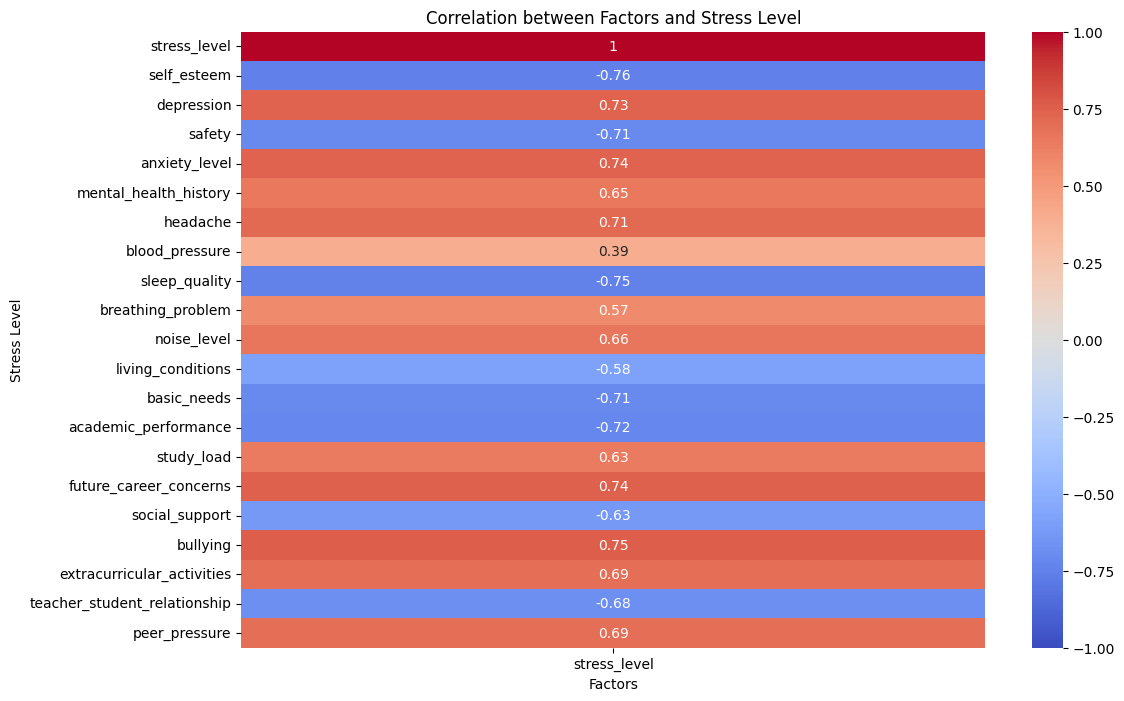

In [101]:
# List of factors and their corresponding columns
factors = {
    'Psychological': ['self_esteem', 'depression', 'safety', 'anxiety_level', 'mental_health_history'],
    'Physiological': ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'],
    'Environmental': ['noise_level', 'living_conditions', 'basic_needs'],
    'Academic': ['academic_performance', 'study_load', 'future_career_concerns'],
    'Social': ['social_support', 'bullying', 'extracurricular_activities', 'teacher_student_relationship', 'peer_pressure']
}

# Calculate correlation coefficients
correlation_matrix = data[['stress_level'] + sum(factors.values(), [])].corr()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['stress_level']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Adding labels and title
plt.title('Correlation between Factors and Stress Level')
plt.xlabel('Factors')
plt.ylabel('Stress Level')

# Show the plot
plt.show()

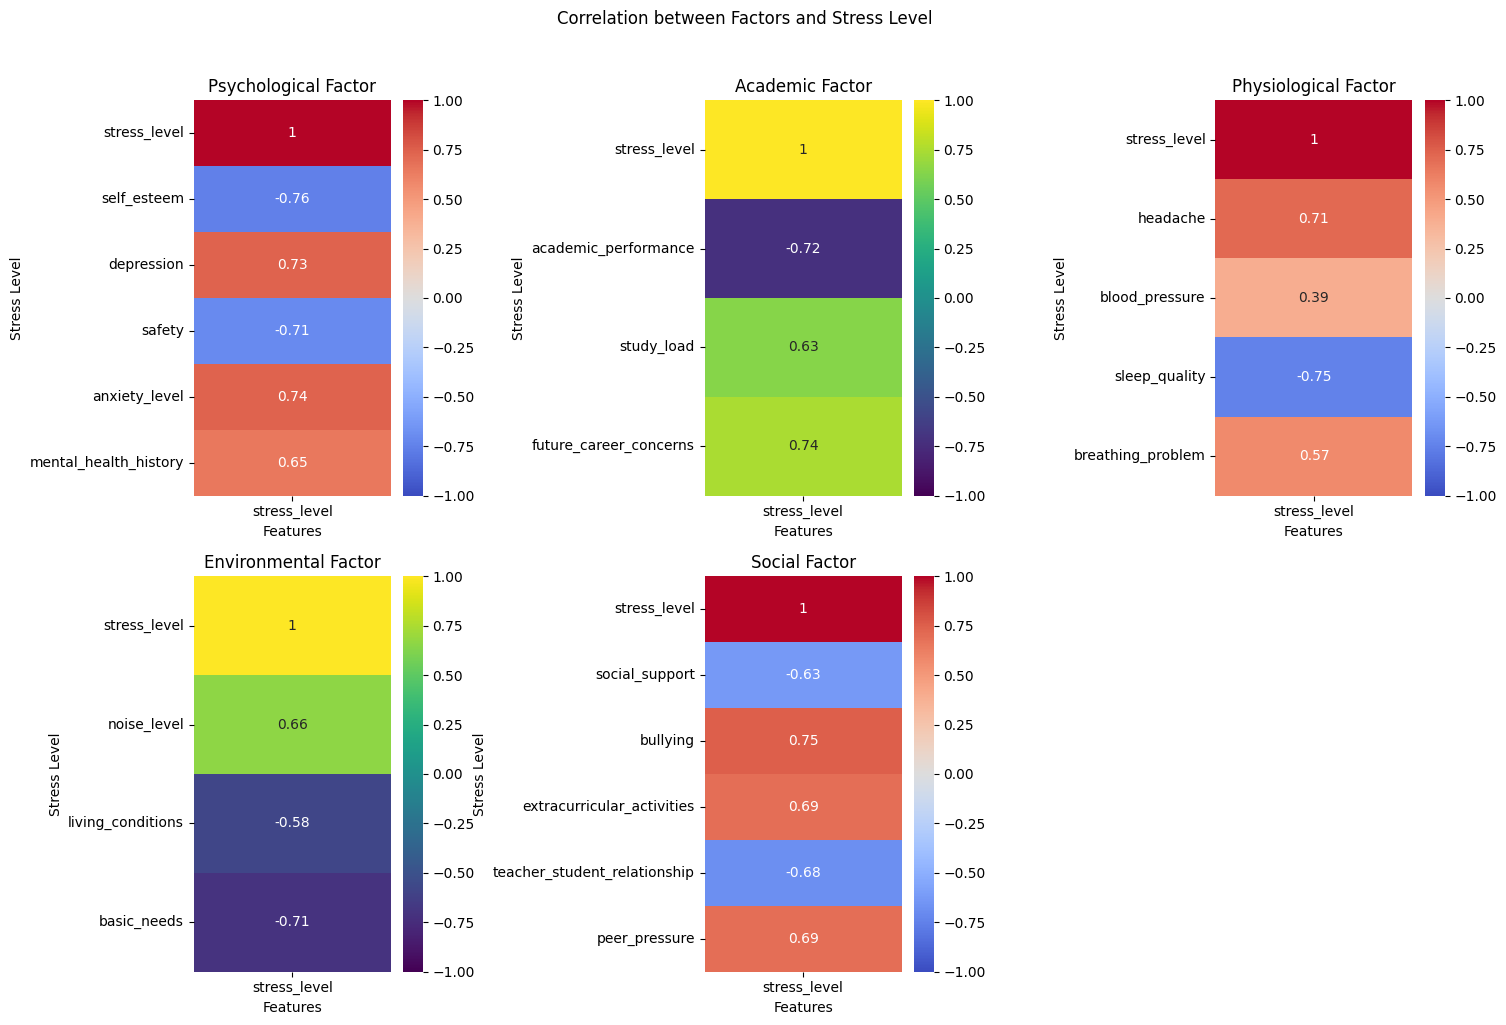

In [105]:
# List of factors and their corresponding columns
factors = {
    'Psychological': ['self_esteem', 'depression', 'safety', 'anxiety_level', 'mental_health_history'],
    'Physiological': ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'],
    'Environmental': ['noise_level', 'living_conditions', 'basic_needs'],
    'Academic': ['academic_performance', 'study_load', 'future_career_concerns'],
    'Social': ['social_support', 'bullying', 'extracurricular_activities', 'teacher_student_relationship', 'peer_pressure']
}

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Correlation between Factors and Stress Level', y=1.02)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each factor and plot the correlation heatmap
for i, (factor, columns) in enumerate(sorted(factors.items(), key=lambda x: abs(data[['stress_level'] + x[1]].corr().iloc[0, 1]), reverse=True)):
    correlation_matrix = data[['stress_level'] + columns].corr()
    
    # Choose a color map for better differentiation
    cmap = 'coolwarm' if i % 2 == 0 else 'viridis'
    
    sns.heatmap(correlation_matrix[['stress_level']], annot=True, cmap=cmap, vmin=-1, vmax=1, ax=axes[i])
    
    # Adding labels and title
    axes[i].set_title(f'{factor} Factor')
    axes[i].set_xlabel('Features')
    axes[i].set_ylabel('Stress Level')

# Remove empty subplots
for i in range(len(factors), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

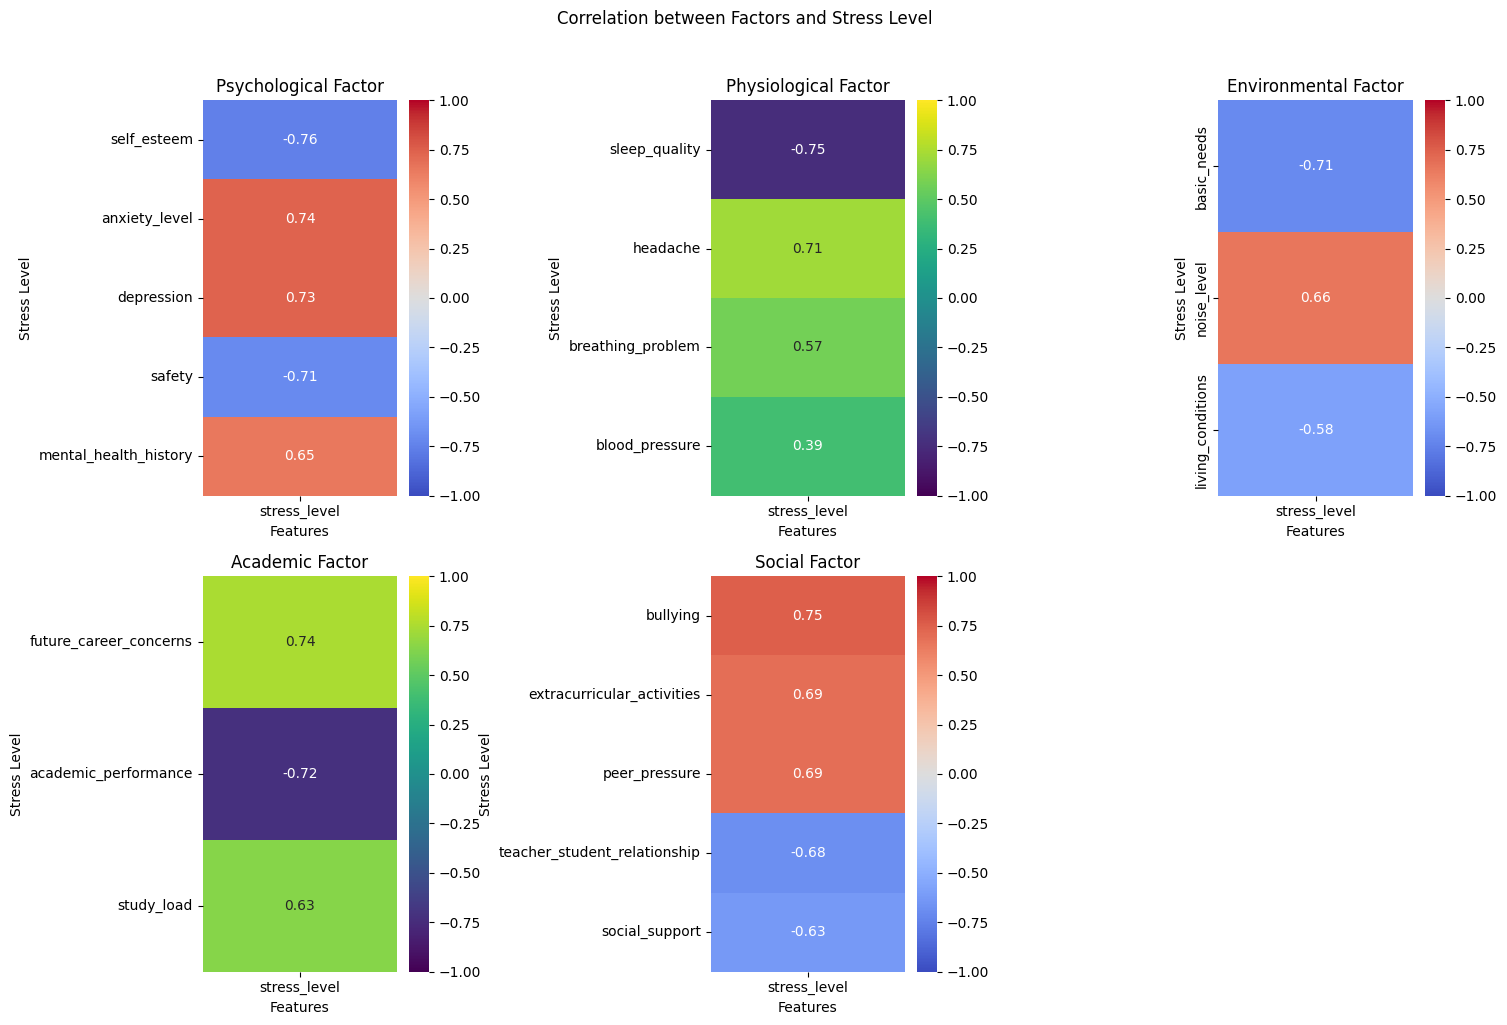

In [106]:
# List of factors and their corresponding columns
factors = {
    'Psychological': ['self_esteem', 'depression', 'safety', 'anxiety_level', 'mental_health_history'],
    'Physiological': ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'],
    'Environmental': ['noise_level', 'living_conditions', 'basic_needs'],
    'Academic': ['academic_performance', 'study_load', 'future_career_concerns'],
    'Social': ['social_support', 'bullying', 'extracurricular_activities', 'teacher_student_relationship', 'peer_pressure']
}

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Correlation between Factors and Stress Level', y=1.02)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Initialize a list to store feature names sorted by correlation
sorted_features = []

# Loop through each factor and collect feature names sorted by correlation
for factor, columns in factors.items():
    correlation_matrix = data[['stress_level'] + columns].corr()
    sorted_features.extend(sorted(columns, key=lambda x: abs(correlation_matrix.loc['stress_level', x]), reverse=True))

# Remove duplicates while preserving order
sorted_features = list(dict.fromkeys(sorted_features))

# Loop through each factor and plot the correlation heatmap
for i, (factor, columns) in enumerate(factors.items()):
    correlation_matrix = data[['stress_level'] + columns].corr()
    
    # Sort columns based on correlation
    sorted_columns = sorted(columns, key=lambda x: abs(correlation_matrix.loc['stress_level', x]), reverse=True)
    
    # Choose a color map for better differentiation
    cmap = 'coolwarm' if i % 2 == 0 else 'viridis'
    
    sns.heatmap(correlation_matrix.loc[sorted_columns, ['stress_level']], annot=True, cmap=cmap, vmin=-1, vmax=1, ax=axes[i])
    
    # Adding labels and title
    axes[i].set_title(f'{factor} Factor')
    axes[i].set_xlabel('Features')
    axes[i].set_ylabel('Stress Level')

    # Set y-axis labels based on sorted columns
    axes[i].set_yticklabels(sorted_columns)

# Remove empty subplots
for i in range(len(factors), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()